In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


##I am working on white-wine quality dataset which is present on UCI Machine Learning Repository. The goal is to predict the wine quality based on different features. 
##The diffrent features were:


##**Input variables (based on physicochemical tests)**:
###1 - fixed acidity
###2 - volatile acidity
###3 - citric acid
###4 - residual sugar
###5 - chlorides
###6 - free sulfur dioxide
###7 - total sulfur dioxide
###8 - density
###9 - pH
###10 - sulphates
###11 - alcohol


##**Output variable (based on sensory data):**
###12 - quality (score between 0 and 10) 

In [0]:

import pandas as pd
import requests
import io

##Here I am trying to download the dataset from UCI website. I have the url of the dataset. 



##Then I have used requests library to retrive information from URL.One of the most common HTTP methodsof this library is GET. The GET method indicates that you’re trying to get or retrieve data from a specified resource. 



##Then i am using pandas library to read the csv file and io library for the formatting of the file. Delimiter ";" is also passed as a parameter to insure that the data is read correctly.

In [0]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
u = requests.get(url).content
dataset = pd.read_csv(io.StringIO(u.decode('utf-8')) , delimiter = ";" , skipinitialspace = True)

##Displaying some part of dataset extracted

In [0]:
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


##Extracting the label and targets from dataset.

In [0]:
x = dataset.drop('quality' , axis = 1)
y = dataset['quality']

#**Data Preprocessing**
##Using model_selection class of sklearn library to import train_test_split function. And from this function, I have created the training set , validation data and test set dataset

In [0]:
from sklearn.model_selection import train_test_split
x_train_1 , x_test , y_train_1 , y_test = train_test_split(x , y , test_size = 0.15 , random_state = 0)
x_train , x_val , y_train , y_val = train_test_split(x_train_1 , y_train_1 , test_size = 0.05 , random_state = 0)


##Using StandardScaler class from sklearn.preprocessing module. It is used to standarize the values of dataset which is essential and is needed to fed as a standarized input for a neural network model. 

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
#Here sc_x is used to understand the structure of training dataset , applying formulas and then transforming the training dataset.
x_train_new = sc_x.fit_transform(x_train)
#Here we don't need to fit it again.
x_test_new  = sc_x.transform(x_test)
x_val_new  = sc_x.transform(x_val)

##Displaying the first row which has 11 features as input. We can see the transformed traing set.

In [0]:
x_train_new[:1,:]

array([[-0.30058233, -0.57817931,  0.30787534, -0.94743849, -0.26459457,
        -0.25520459, -0.87925466, -1.33396223, -0.2545166 ,  1.47316561,
         1.20568736]])

##Displaying the first 5 rows and only 2 features as coulmn per row, which is fixed acidity and volatile acidity.

In [0]:
x_train_new[:5, :2]

array([[-0.30058233, -0.57817931],
       [-1.37286171,  0.81856485],
       [-0.18144018, -0.37864443],
       [-1.25371955, -0.77771419],
       [ 0.65255489,  0.61902997]])

In [0]:
x_train_new[:5,:2].round(2)

array([[-0.3 , -0.58],
       [-1.37,  0.82],
       [-0.18, -0.38],
       [-1.25, -0.78],
       [ 0.65,  0.62]])

#**Visualization**
##Here i am defining a function to plot the "mse loss vs epochs" graph and "mae vs epochs" graph. Basically i am plotting the error and loss graph of every model.

In [0]:
import matplotlib.pyplot as plt
epoch = 30 
def plot_learningCurve(history):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  #plotting the mae vs epoch of training set
  plt.plot(epoch_range, history.history['mae'])
  #plotting the val_mae vs epoch of the validation dataset.
  plt.plot(epoch_range, history.history['val_mae'])
  plt.ylim([0, 2])
  plt.title('Model mae')
  plt.ylabel('mae')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

  print("--------------------------------------------------------")

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.ylim([0, 4])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

In [0]:
import tensorflow as tf
from tensorflow import keras

#**Building model** :
## **Here I'll be creating different models, to analyze different results from different models. As there will be a change in parameters , And the we can do some analysis as how the change in parameters and change in hidden layers effects the results.**

##**Then I'll perform some hyper parameter tuning to improve the results of model and decrease the error of model.**

#**Small Model**  : 

##Here i am creating a simple model of 3 layers:

###1st layer : First input layer of 11 input features.
###2nd layer : 2nd is the hidden layer which have 16 neurons.
###3rd layer : 3rd is the final output layer consisting of one final output neuron.

##Then i have used 'adam' optimizer and 'mean_squarred_error" as loss 'mae' as evaluation metrics.

##history_small is the value which will be passed as history calllbacks in above visalization function. 

In [0]:
small_model = tf.keras.Sequential([
                            tf.keras.layers.Dense(16 , activation = 'relu' , input_shape = (11 , )),
                            tf.keras.layers.Dense(1)
])

small_model.compile(optimizer = 'adam' , loss = 'mse' , metrics = ['mae'])


history_small = small_model.fit(x_train_new , y_train , batch_size=32, epochs = 30,verbose = 1 , validation_data= (x_val_new , y_val))

Train on 3954 samples, validate on 209 samples
Epoch 1/30
3954/3954 [==============================] - 0s 122us/sample - loss: 24.9744 - mae: 4.8012 - val_loss: 16.5111 - val_mae: 3.7909
Epoch 2/30
3954/3954 [==============================] - 0s 46us/sample - loss: 11.9109 - mae: 3.0915 - val_loss: 7.4722 - val_mae: 2.3390
Epoch 3/30
3954/3954 [==============================] - 0s 47us/sample - loss: 5.5874 - mae: 1.9892 - val_loss: 3.7071 - val_mae: 1.5839
Epoch 4/30
3954/3954 [==============================] - 0s 47us/sample - loss: 3.1834 - mae: 1.4462 - val_loss: 2.3886 - val_mae: 1.2711
Epoch 5/30
3954/3954 [==============================] - 0s 44us/sample - loss: 2.3637 - mae: 1.2234 - val_loss: 1.8374 - val_mae: 1.1205
Epoch 6/30
3954/3954 [==============================] - 0s 45us/sample - loss: 1.9768 - mae: 1.1092 - val_loss: 1.5483 - val_mae: 1.0334
Epoch 7/30
3954/3954 [==============================] - 0s 47us/sample - loss: 1.7161 - mae: 1.0335 - val_loss: 1.3466 - val_ma

##Plotting the graph

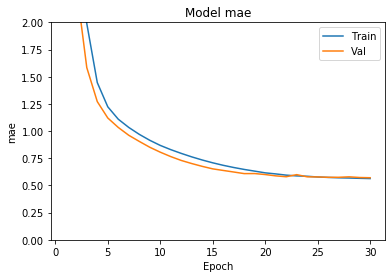

--------------------------------------------------------


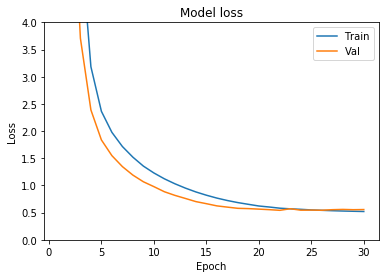

In [0]:
plot_learningCurve(history_small)

In [0]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2762,7.3,0.32,0.35,1.40,0.050,8.0,163.0,0.99244,3.24,0.42,10.7
42,7.0,0.31,0.26,7.40,0.069,28.0,160.0,0.99540,3.13,0.46,9.8
1419,7.6,0.14,0.74,1.60,0.040,27.0,103.0,0.99160,3.07,0.40,10.8
3664,5.0,0.29,0.54,5.70,0.035,54.0,155.0,0.98976,3.27,0.34,12.9
2125,6.0,0.28,0.22,12.15,0.048,42.0,163.0,0.99570,3.20,0.46,10.1


In [0]:
y_test.head()

2762    5
42      6
1419    7
3664    8
2125    5
Name: quality, dtype: int64

#Creating an unseen data for testing the prediction powert of model.
## **I'll use this same set of data for testing of every model which will be created after this**

##Here you can see what small_model has predicted the wine quality of id 2125 : 5.51
##And from y_test we can see id 2125 have the target value as : 5

In [0]:
import numpy as np
y_small = small_model.predict(sc_x.transform(np.array([[6.0 , 0.28 , 0.22 , 12.15 , 0.048 , 42.0 , 163.0 , 0.99570 , 3.20 , 0.46 , 10.1]])))

In [0]:
y_small[0][0]

5.5261474

##Evaluating the results on test_set.

In [0]:
s_test_loss , s_test_mae = small_model.evaluate(x_test_new , y_test , batch_size=32 , verbose=1)
print("small model test_loss : {}".format(s_test_loss))
print("small model test_mae : {} ".format(s_test_mae))

735/735 [==============================] - 0s 37us/sample - loss: 0.5944 - mae: 0.6013
small model test_loss : 0.5944018258529455
small model test_mae : 0.6013163924217224 


#**Medium Model** :
##Here i am creating a medium model of 5 layers:

###1st layer : First input layer of 11 input features.
###2nd layer : 2nd is the hidden layer which have 64 neurons.
###3rd layer : 3rd is the hidden layer which have 64 neurons.
###4th layer : 4th is the hidden layer which have 64 neurons
###5th layer : 5th is the final output layer consisting of one final output neuron.

##Then i have used 'adam' optimizer and 'mean_squarred_error" as loss 'mae' as evaluation metrics.

##history_medium is the value which will be passed as history callbacks in theabove visalization function. 

In [0]:
medium_model = tf.keras.Sequential([
                               tf.keras.layers.Dense(64 , activation = 'relu' , input_shape = (11, )),
                               tf.keras.layers.Dense(64 , activation = 'relu'),
                               tf.keras.layers.Dense(64 , activation = 'relu'),
                               tf.keras.layers.Dense(1)
])

medium_model.compile(loss = 'mse' , optimizer= 'adam' , metrics = ['mae'])


history_medium = medium_model.fit(x_train_new , y_train , batch_size=32, epochs = 30,verbose = 1 , validation_data= (x_val_new , y_val))

Train on 3954 samples, validate on 209 samples
Epoch 1/30
3954/3954 [==============================] - 1s 159us/sample - loss: 7.3737 - mae: 2.0667 - val_loss: 1.7974 - val_mae: 1.1263
Epoch 2/30
3954/3954 [==============================] - 0s 67us/sample - loss: 1.7061 - mae: 0.9951 - val_loss: 1.0418 - val_mae: 0.8354
Epoch 3/30
3954/3954 [==============================] - 0s 65us/sample - loss: 1.0362 - mae: 0.7788 - val_loss: 0.6720 - val_mae: 0.6612
Epoch 4/30
3954/3954 [==============================] - 0s 64us/sample - loss: 0.7054 - mae: 0.6500 - val_loss: 0.5661 - val_mae: 0.5760
Epoch 5/30
3954/3954 [==============================] - 0s 63us/sample - loss: 0.5761 - mae: 0.5912 - val_loss: 0.5641 - val_mae: 0.5733
Epoch 6/30
3954/3954 [==============================] - 0s 63us/sample - loss: 0.5308 - mae: 0.5649 - val_loss: 0.5804 - val_mae: 0.5929
Epoch 7/30
3954/3954 [==============================] - 0s 60us/sample - loss: 0.5026 - mae: 0.5486 - val_loss: 0.5246 - val_mae: 

##Plotting the graph.
##As we can see the smoothness of graph is decreased. As we can clearly there is **overfitting**.
##Training set error and loss is less than the error and loss of validation set.

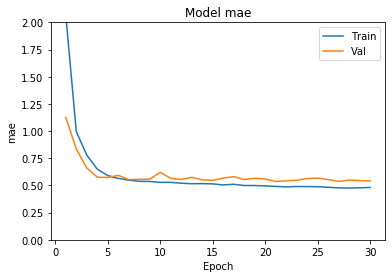

--------------------------------------------------------


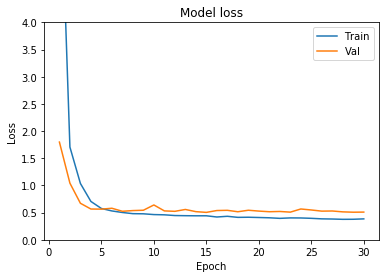

In [0]:
plot_learningCurve(history_medium)

#Testing the predciting power of model on unseen data:
##Here you can see what medium_model has predicted the wine quality of id 2125 : 5.36
##And from y_test we can see id 2125 have the target value as : 5

In [0]:
y_medium = medium_model.predict(sc_x.transform(np.array([[6.0 , 0.28 , 0.22 , 12.15 , 0.048 , 42.0 , 163.0 , 0.99570 , 3.20 , 0.46 , 10.1]])))

In [0]:
y_medium[0][0]

5.361778

##Evaluating the loss and mae of test data:

In [0]:
m_test_loss , m_test_mae = medium_model.evaluate(x_test_new , y_test , batch_size=32 , verbose=1)
print("medium model test_loss : {}".format(m_test_loss))
print("medium model test_mae : {}".format(m_test_mae))

735/735 [==============================] - 0s 43us/sample - loss: 0.5838 - mae: 0.5798
medium model test_loss : 0.5837814279154044
medium model test_mae : 0.5797734260559082


#**Large Model :** 
##Here i am creating a medium model of 6 layers:

###1st layer : First input layer of 11 input features.
###2nd layer : 2nd is the hidden layer which have 128 neurons.
###3rd layer : 3rd is the hidden layer which have 128 neurons.
###4th layer : 4th is the hidden layer which have 128 neurons
###5th layer : 5th is the hidden layer which have 128 neurons
###6th layer : 6th is the final output layer consisting of one final output neuron.

##Then i have used 'adam' optimizer and 'mean_squarred_error" as loss 'mae' as evaluation metrics.

##history_medium is the value which will be passed as history callbacks in theabove visalization function. 

In [0]:
large_model = tf.keras.Sequential([
                               tf.keras.layers.Dense(128 , activation = 'relu' , input_shape = (11, )),
                               tf.keras.layers.Dense(128 , activation = 'relu'),
                               tf.keras.layers.Dense(128 , activation = 'relu'),
                               tf.keras.layers.Dense(128 , activation = 'relu'),
                               tf.keras.layers.Dense(1)
])

large_model.compile(loss = 'mse' , optimizer= 'adam' , metrics = ['mae'])


history_large = large_model.fit(x_train_new , y_train , batch_size=32, epochs = 30,verbose = 1 , validation_data= (x_val_new , y_val))

Train on 3954 samples, validate on 209 samples
Epoch 1/30
3954/3954 [==============================] - 1s 175us/sample - loss: 4.7160 - mae: 1.5721 - val_loss: 1.3101 - val_mae: 0.9247
Epoch 2/30
3954/3954 [==============================] - 0s 80us/sample - loss: 1.1692 - mae: 0.8326 - val_loss: 0.6276 - val_mae: 0.6180
Epoch 3/30
3954/3954 [==============================] - 0s 81us/sample - loss: 0.6427 - mae: 0.6243 - val_loss: 0.6357 - val_mae: 0.6263
Epoch 4/30
3954/3954 [==============================] - 0s 79us/sample - loss: 0.5350 - mae: 0.5684 - val_loss: 0.5344 - val_mae: 0.5621
Epoch 5/30
3954/3954 [==============================] - 0s 78us/sample - loss: 0.5005 - mae: 0.5538 - val_loss: 0.5322 - val_mae: 0.5405
Epoch 6/30
3954/3954 [==============================] - 0s 78us/sample - loss: 0.4706 - mae: 0.5363 - val_loss: 0.5120 - val_mae: 0.5245
Epoch 7/30
3954/3954 [==============================] - 0s 76us/sample - loss: 0.4505 - mae: 0.5236 - val_loss: 0.5481 - val_mae: 

#Plotting the curve :
##As we can see, model has largely overfiited 
#**training set loss : 0.2368**
#**validation set loss : 0.5547**
#**Result of overfitting**

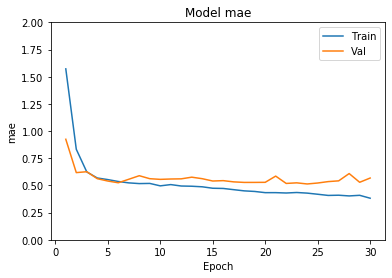

--------------------------------------------------------


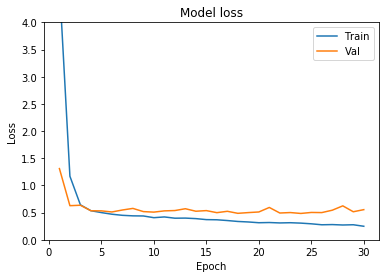

In [0]:
plot_learningCurve(history_large)

##Testing model predicting powe on the same unseen data :
##Here you can see what large_model has predicted the wine quality of id 2125 : 5.22
##And from y_test we can see id 2125 have the target value as : 5

In [0]:
y_large = large_model.predict(sc_x.transform(np.array([[6.0 , 0.28 , 0.22 , 12.15 , 0.048 , 42.0 , 163.0 , 0.99570 , 3.20 , 0.46 , 10.1]])))
print(y_large[0][0])

5.288604


##Evaluating the loss and error of test data

In [0]:
l_test_loss , l_test_mae = large_model.evaluate(x_test_new , y_test , batch_size=32 , verbose=1)
print("large model test_loss : {}".format(l_test_loss))
print("large model test_mae : {}".format(l_test_mae))

735/735 [==============================] - 0s 40us/sample - loss: 0.5418 - mae: 0.5538
large model test_loss : 0.5417821284459562
large model test_mae : 0.5537858605384827


-----------------------------------------------------------------------------

#Here we clearly have a case of **overfitting**., So i have done some optimzations to decrease overfitting of the model

## 1st by changing the learning rate of model , to have better fitting of weights. I have done this by using RMSprop optimizer

## 2nd by regulazring the weights by using kernel regulizer.

##Here i am creating a simple model of 4 layers:

###1st layer : First input layer of 11 input features.
###2nd layer : 2nd is the hidden layer which have 16 neurons.
###3rd layer : 3rd is the hidden layer which have 16 neurons.
###4th layer : 4th is the final output layer consisting of one final output neuron.

##Then i have used 'RMSprop' with learning rate 0.001 optimizer and 'mean_squarred_error" as loss 'mae' as evaluation metrics.

##history_small is the value which will be passed as history calllbacks in above visalization function. 

In [0]:
model_1 = tf.keras.Sequential([
                            tf.keras.layers.Dense(16 , activation = 'relu' , input_shape = (11 , )),
                            tf.keras.layers.Dense(16 , activation = 'relu'),
                            tf.keras.layers.Dense(1)
])

optimizer =   optimizer = tf.keras.optimizers.RMSprop(0.001)

model_1.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

history_1 = model_1.fit(x_train_new , y_train , batch_size=32, epochs = 30,verbose = 1 , validation_data= (x_val_new , y_val))

Train on 3954 samples, validate on 209 samples
Epoch 1/30
3954/3954 [==============================] - 1s 151us/sample - loss: 10.6396 - mae: 2.7941 - val_loss: 3.3406 - val_mae: 1.4807
Epoch 2/30
3954/3954 [==============================] - 0s 48us/sample - loss: 2.5827 - mae: 1.2373 - val_loss: 1.8174 - val_mae: 1.1118
Epoch 3/30
3954/3954 [==============================] - 0s 48us/sample - loss: 1.6493 - mae: 0.9789 - val_loss: 1.1958 - val_mae: 0.9094
Epoch 4/30
3954/3954 [==============================] - 0s 47us/sample - loss: 1.1864 - mae: 0.8287 - val_loss: 0.9058 - val_mae: 0.7853
Epoch 5/30
3954/3954 [==============================] - 0s 49us/sample - loss: 0.9323 - mae: 0.7348 - val_loss: 0.7773 - val_mae: 0.7127
Epoch 6/30
3954/3954 [==============================] - 0s 49us/sample - loss: 0.7755 - mae: 0.6754 - val_loss: 0.7033 - val_mae: 0.6607
Epoch 7/30
3954/3954 [==============================] - 0s 50us/sample - loss: 0.6837 - mae: 0.6340 - val_loss: 0.6104 - val_mae:

## we can clearly see, the model is not overfitting now.
##train_set mae : 0.5313
##val_set loss : 0.5629

##By plotting the graph also, we can see that the smoothness of graph have been increased. 

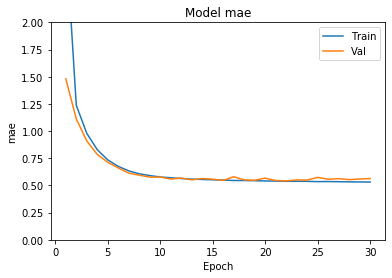

--------------------------------------------------------


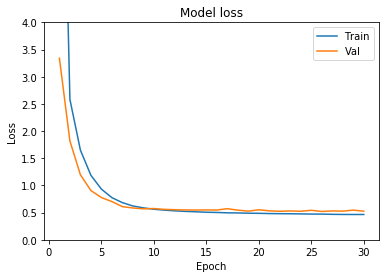

In [0]:
plot_learningCurve(history_1)

##Testing model predicting powe on the same unseen data :
##Here you can see what model has predicted the wine quality of id 2125 : 5.7
##And from y_test we can see id 2125 have the target value as : 

In [0]:
y_model_1 = model_1.predict(sc_x.transform(np.array([[6.0 , 0.28 , 0.22 , 12.15 , 0.048 , 42.0 , 163.0 , 0.99570 , 3.20 , 0.46 , 10.1]])))
print(y_model_1[0][0])

5.7238154


##Evaluating the loss and error of test results.

In [0]:
test_loss , test_mae = model_1.evaluate(x_test_new , y_test , batch_size=32 , verbose=1)
print("model test_loss : {}".format(test_loss))
print("model test_mae : {}".format(test_mae))

735/735 [==============================] - 0s 39us/sample - loss: 0.5616 - mae: 0.5859
model test_loss : 0.5615698872780314
model test_mae : 0.5859430432319641


##Another attempt to reduce overfitting.

In [0]:
model_2 = tf.keras.Sequential([
                            tf.keras.layers.Dense(16 , activation = 'relu' , kernel_regularizer = tf.keras.regularizers.l2(0.001), input_shape = (11 , )),
                            tf.keras.layers.Dense(16 , activation = 'relu' , kernel_regularizer = tf.keras.regularizers.l2(0.001)),
                            tf.keras.layers.Dense(1)
])

optimizer = optimizer = tf.keras.optimizers.RMSprop(0.001)

model_2.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

history_2 = model_2.fit(x_train_new , y_train , batch_size=32, epochs = 30,verbose = 1 , validation_data= (x_val_new , y_val))

Train on 3954 samples, validate on 209 samples
Epoch 1/30
3954/3954 [==============================] - 1s 150us/sample - loss: 19.5074 - mae: 4.1042 - val_loss: 12.7717 - val_mae: 3.1805
Epoch 2/30
3954/3954 [==============================] - 0s 47us/sample - loss: 8.5625 - mae: 2.5245 - val_loss: 4.6329 - val_mae: 1.8540
Epoch 3/30
3954/3954 [==============================] - 0s 46us/sample - loss: 3.3236 - mae: 1.4604 - val_loss: 2.3474 - val_mae: 1.2701
Epoch 4/30
3954/3954 [==============================] - 0s 49us/sample - loss: 2.2890 - mae: 1.1775 - val_loss: 1.6924 - val_mae: 1.0635
Epoch 5/30
3954/3954 [==============================] - 0s 46us/sample - loss: 1.7349 - mae: 1.0135 - val_loss: 1.2515 - val_mae: 0.9147
Epoch 6/30
3954/3954 [==============================] - 0s 46us/sample - loss: 1.3598 - mae: 0.8893 - val_loss: 0.9965 - val_mae: 0.8014
Epoch 7/30
3954/3954 [==============================] - 0s 47us/sample - loss: 1.1145 - mae: 0.7977 - val_loss: 0.8170 - val_mae

##Overfitting from origal model have been reduced.

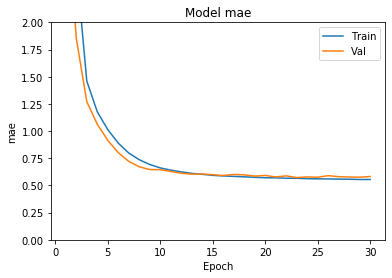

--------------------------------------------------------


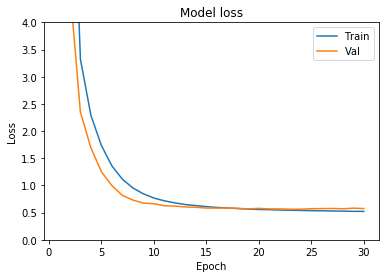

In [0]:
plot_learningCurve(history_2)

##Testing model predicting powe on the same unseen data :
##Here you can see what model has predicted the wine quality of id 2125 : 5.85
##And from y_test we can see id 2125 have the target value as : 

In [0]:
y_model_2 = model_2.predict(sc_x.transform(np.array([[6.0 , 0.28 , 0.22 , 12.15 , 0.048 , 42.0 , 163.0 , 0.99570 , 3.20 , 0.46 , 10.1]])))
print(y_model_2[0][0])

5.8550153


In [0]:
test_loss , test_mae = model_2.evaluate(x_test_new , y_test , batch_size=32 , verbose=1)
print("model test_loss : {}".format(test_loss))
print("model test_mae : {}".format(test_mae))

735/735 [==============================] - 0s 37us/sample - loss: 0.6111 - mae: 0.6039
model test_loss : 0.6110798672753938
model test_mae : 0.6038542985916138
